In [0]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
import matplotlib.pyplot as plt

The following implementation is inspired by: https://github.com/JWarmenhoven/ISLR-python/blob/master/Notebooks/Chapter%2010.ipynb

# Generate data

In [0]:
# Generate data
np.random.seed(2)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

# KMeans

In [0]:
# Fit with k = 2
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

# Fit with k = 3
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [0]:
#Print labels
print(km1.labels_)
print(km2.labels_)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1]
[2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 0 2 2 2 1 1 1 1 0 1 1 1 0 1 1 1
 1 1 0 1 1 0 1 1 1 1 1 1 0]


In [0]:
# Print cluster centers
print(km1.cluster_centers_)
print(km2.cluster_centers_)

[[-0.23940153  0.14703307]
 [ 2.53287159 -3.80815122]]
[[ 0.69945422 -2.14934345]
 [-0.27876523  0.51224152]
 [ 2.82805911 -4.11351797]]


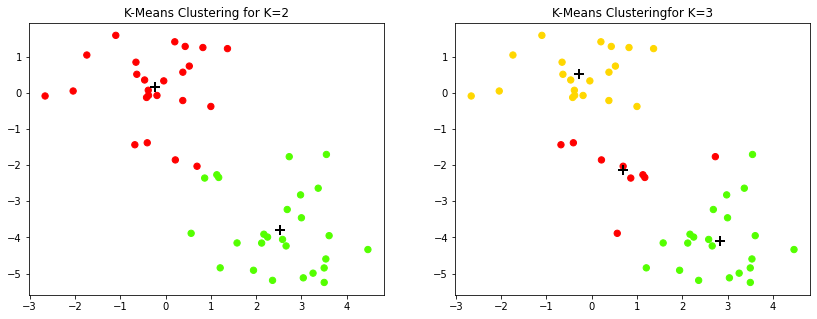

In [0]:
# Plot KMeans clusters
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering for K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clusteringfor K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);

# Hierachical clustering

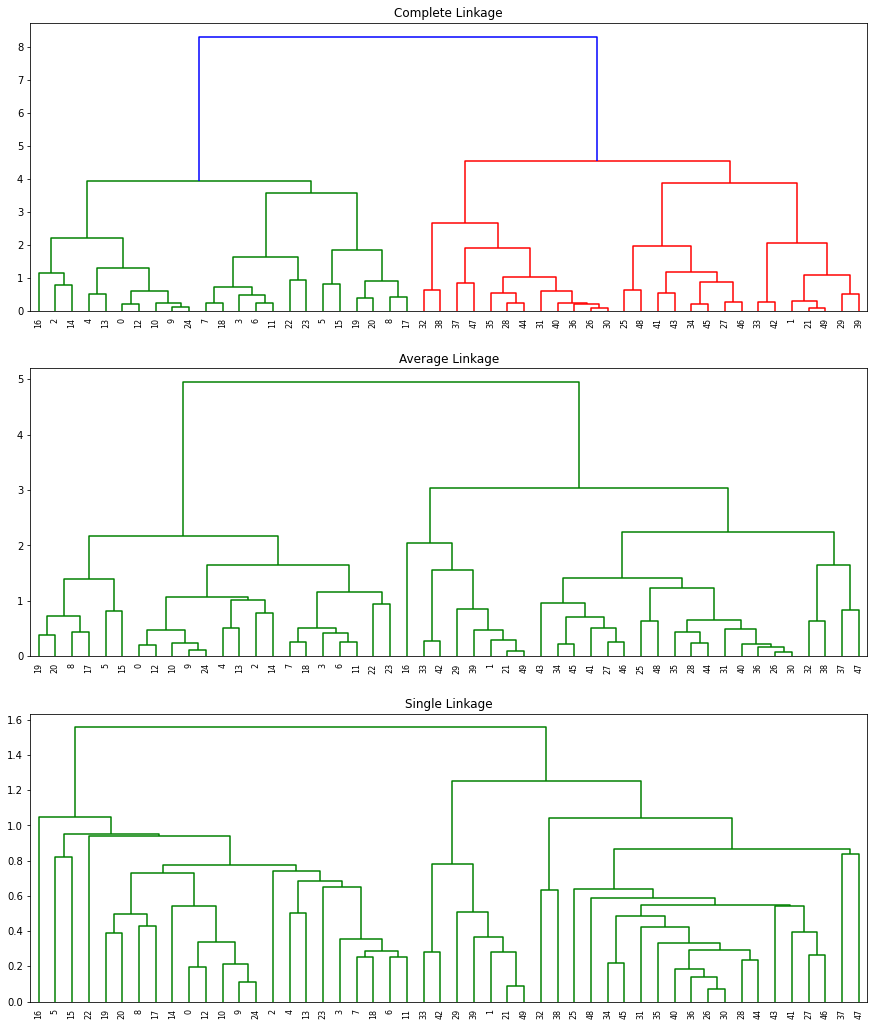

In [0]:
# Plot hierachical clustering
fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,18))

for linkage, cluster, ax in zip([hierarchy.complete(X), hierarchy.average(X), hierarchy.single(X)], ['c1','c2','c3'],
                                [ax1,ax2,ax3]):
    cluster = hierarchy.dendrogram(linkage, ax=ax, color_threshold=5)

ax1.set_title('Complete Linkage')
ax2.set_title('Average Linkage')
ax3.set_title('Single Linkage');